# 18.06 Problem Set 6

## Problem 1 [5+5+5+5+5]

### (a)

In [1]:
v = [48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12]; # data from Boyle table, column A
p = [29+2/16, 30+9/16, 31+15/16, 33+8/16, 35+5/16, 37, 39+4/16, 41+10/16, 44+3/16, 47+1/16, 50+5/16, 54+5/16, 58+13/16, 61+5/16, 64+1/16, 67+1/16, 70+11/16, 74+2/16, 77+14/16, 82+12/16, 87+14/16, 93+1/16, 100+7/16, 107+13/16, 117+9/16]; # data from Boyle table, column D

### (b)

In [2]:
invp = 1 ./ p
# Pα = V => project V onto the column space of P
proj = invp * (transpose(invp) * v) /  (transpose(invp) * invp)
α = invp \ proj # least-square fit

1407.8383939127089

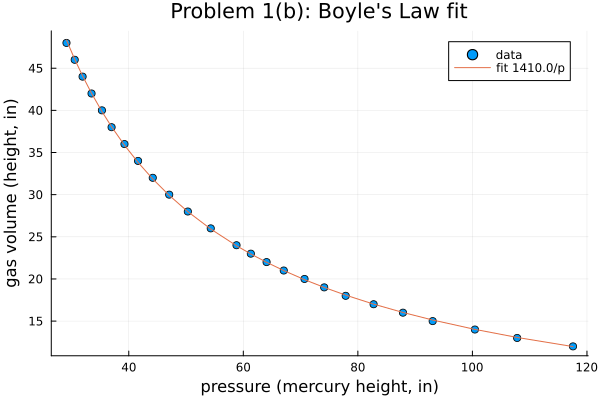

In [3]:
using Plots   # you might have to install it first: import Pkg; Pkg.add("Plots")

plot(p, v, seriestype = :scatter, label="data", title = "Problem 1(b): Boyle's Law fit", fmt=:png)
plot!(p, α ./ p, label="fit $(round(α,sigdigits=3))/p")
xlabel!("pressure (mercury height, in)")
ylabel!("gas volume (height, in)")

### (c)

In [4]:
one = ones(25,1)
A = [one 1 ./ p]
# Ax = v => project v onto the column space of P
x = (transpose(A) * A)^-1 * transpose(A) * v

2-element Vector{Float64}:
    0.03915184309354913
 1406.091929152648

### (d)
Yes, because if $v_0 = 0$ and the gas exactly obeyed Boyle's law then there would be only one line goes through all the data points with no error and the $v_0$ of smallest square fit should be $0$.

### (e)

In [5]:
# v = αp^n => log v = n log p + log α
B = [one log.(p)]
y = (transpose(B) * B)^-1 * transpose(B) * (log.(v))
println("α = ", exp(y[1]), ", n = ", y[2])

α = 1415.8745653651235, n = -1.0013839808494112


## Problem 2 [5+5]

### (a)
$$F^T = (I - 2qq^T)^T = I - 2qq^T = F$$
And
$$F^2 = (I - 2qq^T)(I - 2qq^T) = I - 4qq^T + 4qq^Tqq^T = I - 4qq^T + 4qq^T = I$$
Therefore $F = F^T = F^{-1}$, so $F$ is unitary.  

### (b)
If $x$ is parallel to $q$, then assume $x = kq$,
$$Fx = x - 2qq^Tx = kq - 2kqq^Tq = kq - 2kq = -kq = -x$$
If $x$ is perpendicular to $q$, then
$$Fx = x - 2qq^Tx = x$$
Therefore we can see $F$ is *reflecting* the part that is parallel to itself.  

<img src="./resources/reflector.png" alt="reflector.png" style="width: 300px;"/>

## Problem 3 [6+4]

### (a)
We derive the answer explicitly by rearranging the equation.
$$p - q = 
\begin{bmatrix}
    \alpha \\ \alpha \\ \alpha 
\end{bmatrix} - \begin{bmatrix}
    \beta \\ 3\beta \\ -1
\end{bmatrix} = \begin{bmatrix}
    \alpha - \beta \\ \alpha - 3\beta \\ \alpha 
\end{bmatrix} - \begin{bmatrix}
    0 \\ 0 \\ -1
\end{bmatrix} = \begin{bmatrix}
    1 & -1 \\ 1 & -3 \\ 1 & 0 
\end{bmatrix}\begin{bmatrix}
    \alpha \\ \beta
\end{bmatrix} - \begin{bmatrix}
    0 \\ 0 \\ -1
\end{bmatrix}$$
Therefore
$$A = \begin{bmatrix}
    1 & -1 \\ 1 & -3 \\ 1 & 0 
\end{bmatrix}, x = \begin{bmatrix}
    \alpha \\ \beta
\end{bmatrix}, b = \begin{bmatrix}
    0 \\ 0 \\ -1
\end{bmatrix}$$
Solving the minimizer $\hat x$, 
$$A^TA\hat x = A^Tb$$
$$\begin{bmatrix}
    3 & -4 \\ -4 & 10
\end{bmatrix}\begin{bmatrix}
    \alpha \\ \beta
\end{bmatrix} = \begin{bmatrix}
    -1 \\ 0
\end{bmatrix}\Rightarrow \begin{bmatrix}
    \alpha \\ \beta
\end{bmatrix} = \begin{bmatrix}
    -\frac 5 7 \\ -\frac 2 7
\end{bmatrix}$$

### (b)
$C(p)$ and $C(q)$.  

## Problem 4 [6+4]

### (a)
First,
$$u_1 = a_1 = \begin{bmatrix}1 \\ -1 \\ 0 \\ 0\end{bmatrix}$$
Second,
$$u_2 = a_2 - \frac{u_1^Ta_2}{u_1^Tu_1}u_1 = \begin{bmatrix}0 \\ 1 \\ -1 \\ 0\end{bmatrix} + \frac 1 2\begin{bmatrix}1 \\ -1 \\ 0 \\ 0\end{bmatrix} = \begin{bmatrix}\frac 1 2 \\ \frac 1 2 \\ -1 \\ 0\end{bmatrix}$$
Third,
$$u_3 = a_3 - \frac{u_1^Ta_3}{u_1^Tu_1}u_1 - \frac{u_2^Ta_3}{u_2^Tu_2}u_2 = \begin{bmatrix}0 \\ 0 \\ 1 \\ -1 \end{bmatrix} - 0\begin{bmatrix}1 \\ -1 \\ 0 \\ 0\end{bmatrix} + \frac 2 3\begin{bmatrix} \frac 1 2 \\ \frac 1 2 \\ -1 \\ 0\end{bmatrix} = \begin{bmatrix} \frac 1 3 \\ \frac 1 3 \\ \frac 1 3 \\ -1\end{bmatrix}$$
Finally, we are going to normalize them:
$$q_1 = \frac{1}{\sqrt 2}\begin{bmatrix}1 \\ -1 \\ 0 \\ 0\end{bmatrix}, q_2 = \frac{2}{\sqrt 6}\begin{bmatrix}\frac 1 2 \\ \frac 1 2 \\ -1 \\ 0\end{bmatrix}, q_3 = \frac{3}{2\sqrt {3}}\begin{bmatrix} \frac 1 3 \\ \frac 1 3 \\ \frac 1 3 \\ -1\end{bmatrix}$$
which is a basis of the null space of $d^T$.  

### (b)
Since $d^TQ = \mathbf 0$, $Q^Td = \mathbf 0 = \begin{bmatrix} 0 \\ 0 \\ 0\end{bmatrix}$.